<a href="https://colab.research.google.com/github/Nihal-18/ML/blob/master/Exp_2_J058.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exp 2


---

J058

Nihal Todankar

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

Exercise - 1

Q-1)	

---



---


Import dataset store it as dataframe in 
python: filename = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/auto.csv"

In [ ]:
filename = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/auto.csv"

Q-2)

---

Add column headers to dataset

In [ ]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
	"drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
	"num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
	"peak-rpm","city-mpg","highway-mpg","price"]

In [ ]:
automob = pd.read_csv(filename,names = headers)

In [ ]:
df = automob
df.shape

(205, 26)

Q-3)

---

Read the first 5 lines and display

In [ ]:
automob.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Q-4)

---

Are there missing data? Or illegal characters in the dataframe?

Yes there are illegal characters in the dataframe suh as '?'
The '?' will be replaced by np.nan which is nothing but no value remark

Q-5)

---
Replace the character “?” with nan


In [ ]:
automob.replace("?",np.nan,inplace=True)

In [ ]:
np.sum(automob.isnull())

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

OR WE CAN DO THIS BELOW METHOD


Q-6)
Count missing values in each column and print it with column name

In [ ]:
for columns in missing.columns.values.tolist():
  print(columns)
  print(missing[columns].value_counts())
  print("")

NameError: ignored

Q-7)

---
Normalized losses,bore,stroke,horsepower,peak-rpm, - replace missing with mean of the column


In [ ]:
avg_normloss = automob['normalized-losses'].astype('float').mean(axis=0)
avg_normloss

122.0

In [ ]:
automob['normalized-losses'].replace(np.nan,avg_normloss,inplace=True)
print("Mean of normalized-losses = ",avg_normloss)

Mean of normalized-losses =  122.0


In [ ]:
avg_bore = automob['bore'].astype('float').mean(axis=0)
avg_bore

3.3297512437810957

In [ ]:
automob['bore'].replace(np.nan,avg_bore,inplace=True)
print("Mean of bore = ",avg_bore)

Mean of bore =  3.3297512437810957


In [ ]:
avg_stroke = automob['stroke'].astype('float').mean(axis=0)
automob['stroke'].replace(np.nan,avg_stroke,inplace=True)
print("MEan of stroke = ",avg_stroke)

MEan of stroke =  3.2554228855721337


In [ ]:
avg_hp = automob['horsepower'].astype('float').mean(axis=0)
automob['horsepower'].replace(np.nan,avg_hp,inplace=True)
print("MEan of horsepower = ",avg_hp)

MEan of horsepower =  104.25615763546799


In [ ]:
avg_rpm = automob['peak-rpm'].astype('float').mean(axis=0)
automob['peak-rpm'].replace(np.nan,avg_rpm,inplace=True)
print("MEan of rpm = ",avg_rpm)

MEan of rpm =  5125.369458128079


Q-8)

---
Num-of-doors replace missing with most frequent value in the column


In [ ]:
automob['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [ ]:
automob['num-of-doors'].replace(np.nan,'four',inplace=True)


In [ ]:
automob['price'].isnull().sum()

4

Q-9)

---
Delete price rows that have missing data


In [ ]:
automob.dropna(subset=['price'],axis=0,inplace=True)

Q-10)

---





Reset the index of dataframe

In [ ]:
automob.reset_index(drop=True, inplace=True)

Q-11)

---

Check datatype of columns and convert numeric/quantitative variables to float or int

In [ ]:
automob.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [ ]:
automob[['bore','stroke','price','horsepower','peak-rpm']] = automob[['bore','stroke','price','horsepower','peak-rpm']].astype(float)

In [ ]:
automob['normalized-losses'] = automob['normalized-losses'].astype(int)

Q-12)

---
Transform city-mpg and highway-mpg into liters/100km using conversion formula:
L/100km = 235/mpg i.e. create two new column “city-L/100km” and “highway-L/100km”



In [ ]:
for i in automob['city-mpg']:

  automob['city-L/100km'] = automob['city-mpg']/235

In [ ]:
for i in automob['highway-mpg']:
  automob['highway-L/100km'] = automob['highway-mpg']/235

Q-13)

---

Normalize columns length, width, height so that their values range from 0 to 1.         
 Hint:  Replace original values with original_value/max_value


In [ ]:
l_max = np.max(automob['length'])
w_max = np.max(automob['width'])
h_max = np.max(automob['height'])

In [ ]:
print(l_max,w_max,h_max)

208.1 72.0 59.8


In [ ]:
automob

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,0.089362,0.114894
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,0.089362,0.114894
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,0.080851,0.110638
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,0.102128,0.127660
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,0.076596,0.093617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0,0.097872,0.119149
197,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0,0.080851,0.106383
198,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0,0.076596,0.097872
199,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0,0.110638,0.114894


In [ ]:
for i in range(len(automob)):
  automob['length'] = automob['length'] / l_max
  automob['width'] = automob['width'] / w_max
  automob['height'] = automob['height'] / h_max

Q-14)

---
Plot the histogram of horsepower to see its distribution


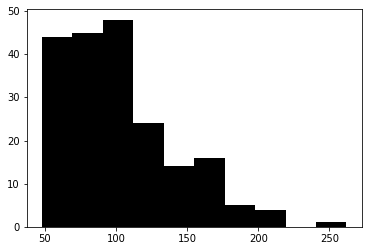

In [ ]:
plt.hist(automob['horsepower'],color='k')
plt.show();

Q-15)

---

Create three equal sized bins “low”, “medium”, “high” and organize values in column horsepower into new column “horsepower-binned”

In [ ]:
hmax= np.max(automob['horsepower'])
hmin= np.min(automob['horsepower'])
print(hmax,hmin)

262.0 48.0


In [ ]:
automob = automob.drop('horsepower-binned',axis=1) #data = data.drop("Area", axis=1)


In [ ]:
automob['horsepower'].shape

(201,)

In [ ]:
interval = (hmax-hmin)/3

In [ ]:
interval

71.33333333333333

In [ ]:
for i in range(0,201):

  if i < 70:
    horsebinned = hp[i]
    automob['horsepower-binned'] = horsebinned

  elif i>=70 and i<140:
    horsebinned = hp[i]
    automob['horsepower-binned'] = horsebinned
  else:
    horsebinned = hp[i]
    automob['horsepower-binned'] = horsebinned

   

In [ ]:
automob['horsepower-binned']

0      262.0
1      262.0
2      262.0
3      262.0
4      262.0
       ...  
196    262.0
197    262.0
198    262.0
199    262.0
200    262.0
Name: horsepower-binned, Length: 201, dtype: float64

In [ ]:
automob['horsepower']

0      111.0
1      111.0
2      154.0
3      102.0
4      115.0
       ...  
196    114.0
197    160.0
198    134.0
199    106.0
200    114.0
Name: horsepower, Length: 201, dtype: float64

Q-16)

---
Plot distribution of “horsepower-binned”

Q-17)

---
Convert “fuel-type” into one-hot-encoded variables. Repeat same for “aspiration” and then drop columns “fuel-type” and “aspiration”


In [ ]:
automob['fuel-type'].describe()

count     201
unique      2
top       gas
freq      181
Name: fuel-type, dtype: object

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer 


In [ ]:
   
columnTransformer1 = ColumnTransformer([('encoder', 
                                        OneHotEncoder(), 
                                        [0])], 
                                      remainder='passthrough') 
  
automob['fuel-type'] = np.array(columnTransformer1.fit_transform(automob['fuel-type']), dtype = np.str)

IndexError: ignored

In [ ]:
label_encoder1 = LabelEncoder()
integer_encoded1 = label_encoder1.fit_transform(automob['aspiration'])
print(integer_encoded)
integer_encoded1 = integer_encoded1.reshape(len(integer_encoded1), 1)

### One hot encoding
onehot_encoder1 = OneHotEncoder(sparse=False)
onehot_encoded1 = onehot_encoder1.fit_transform(integer_encoded1)


[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]


In [ ]:
automob.drop(['fuel-type','aspiration'],axis=1)

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.0,0.0,0.0,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,0.089362,0.114894
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.0,0.0,0.0,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,0.089362,0.114894
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.0,0.0,0.0,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,0.080851,0.110638
3,2,164,audi,four,sedan,fwd,front,99.8,0.0,0.0,0.0,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,0.102128,0.127660
4,2,164,audi,four,sedan,4wd,front,99.4,0.0,0.0,0.0,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,0.076596,0.093617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,four,sedan,rwd,front,109.1,0.0,0.0,0.0,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0,0.097872,0.119149
197,-1,95,volvo,four,sedan,rwd,front,109.1,0.0,0.0,0.0,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0,0.080851,0.106383
198,-1,95,volvo,four,sedan,rwd,front,109.1,0.0,0.0,0.0,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0,0.076596,0.097872
199,-1,95,volvo,four,sedan,rwd,front,109.1,0.0,0.0,0.0,3217,ohc,six,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0,0.110638,0.114894


In [ ]:
automob.reset_index(drop=True,inplace=True)

In [ ]:
automob.shape

(201, 28)

In [ ]:
automob

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,0.0,0.0,0.0,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,0.089362,0.114894
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,0.0,0.0,0.0,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,0.089362,0.114894
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,0.0,0.0,0.0,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,0.080851,0.110638
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,0.0,0.0,0.0,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,0.102128,0.127660
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,0.0,0.0,0.0,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,0.076596,0.093617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,0.0,0.0,0.0,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0,0.097872,0.119149
197,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,0.0,0.0,0.0,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0,0.080851,0.106383
198,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,0.0,0.0,0.0,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0,0.076596,0.097872
199,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,0.0,0.0,0.0,3217,ohc,six,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0,0.110638,0.114894


## EXERCISE 2


1.	Import the dataset


In [24]:
path='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'

In [25]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
	"drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
	"num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
	"peak-rpm","city-mpg","highway-mpg","price"]

2.	Import matplotlib, seaborn, numpy and pandas

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [27]:
df = pd.read_csv(path)

3.	See dimensions of data frame and its data types for each column

In [28]:
print(df.dtypes)

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object


In [29]:
print(df.shape)

(201, 29)


4.	Calculate correlation between engine-size and price using corr function

In [30]:
ens = df['engine-size']

In [31]:
prc = df['price']

In [32]:
d2 = pd.DataFrame(data=(ens,prc))

In [33]:
d2.corr()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
197,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
198,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
199,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


7.	Using seaborn regplot() - plot relation between “engine-size” and “price”. Comment on your observation.

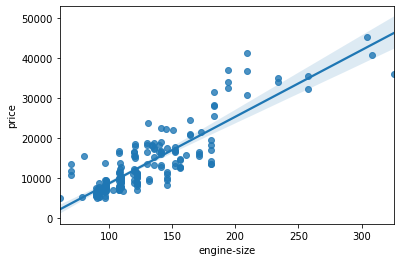

In [18]:
sb.regplot(x=df['engine-size'],y=df['price']);

8.	Identify using regplot() - which other variables can affect “price” and which do not affect it.

In [ ]:
for i in range df:
   

9.	Use seaborn pairplot() to identify which variables can affect “price”

KeyboardInterrupt: ignored

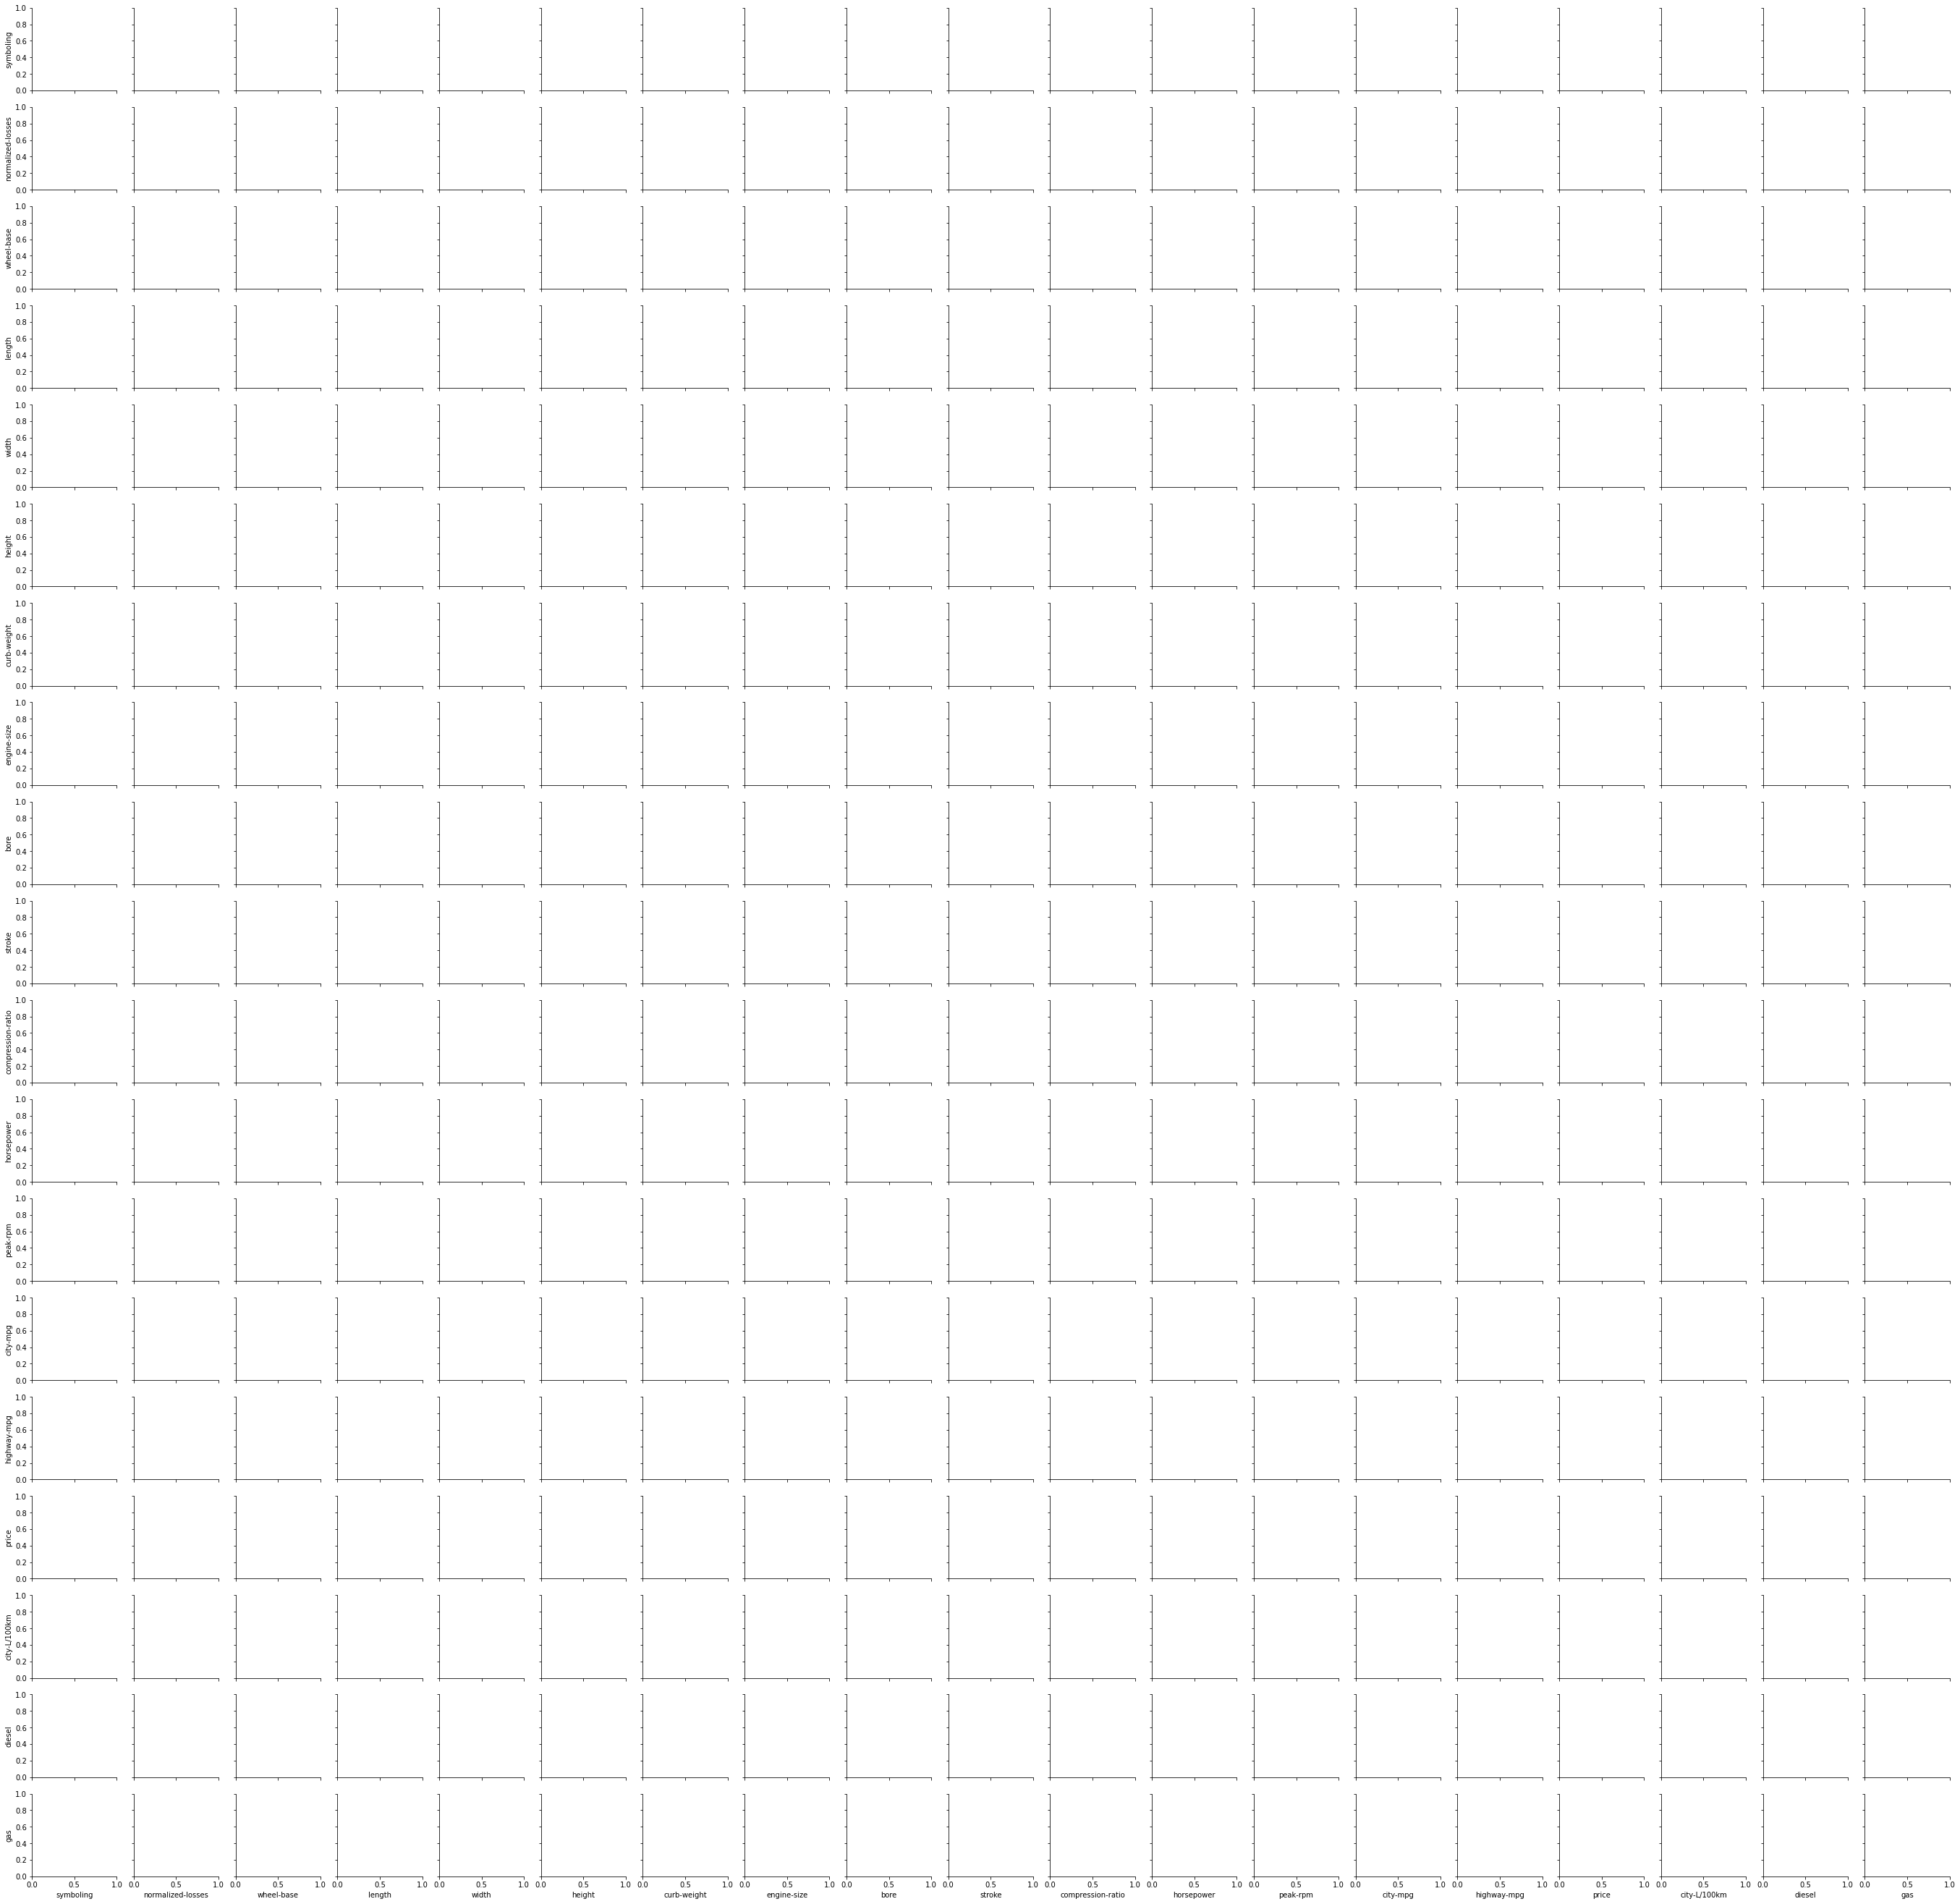

In [22]:
sb.pairplot(df)

10.	Draw a heatmap to plot the correlation in the dataframe

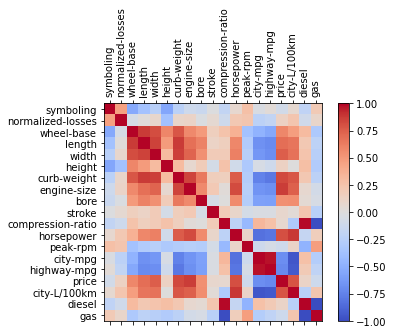

In [36]:
# optional

corr = df.corr()

# create fig and add subplot
fig = plt.figure()
ax = fig.add_subplot()

# add data
cax = ax.matshow(corr, cmap='coolwarm')

# create colorbar
fig.colorbar(cax)

# label
ticks = np.arange(0, len(corr.columns),1)

ax.set_xticks(ticks)

ax.set_yticks(ticks)


# rotation
plt.xticks(rotation=90)

# label x-axis
ax.set_xticklabels(corr.columns)

# label y-axis
ax.set_yticklabels(corr.columns)

plt.show()

11.	With seaborn boxplot() - compare “body-style” with “price” 

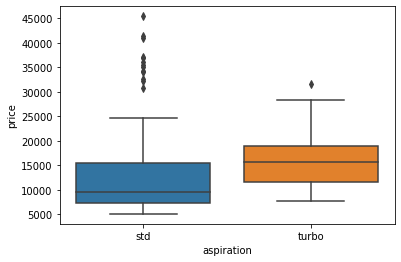

In [35]:
sb.boxplot(x="aspiration", y="price", data=df);

In [37]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object


12.	Continue for other categorical variables in the dataset.



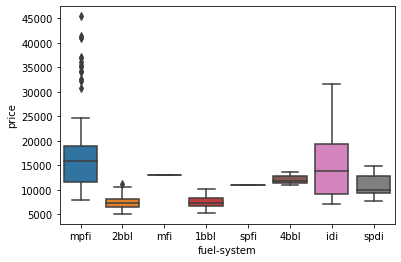

In [38]:
sb.boxplot(x="fuel-system", y="price", data=df);

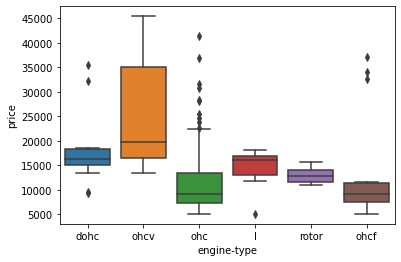

In [39]:
sb.boxplot(x="engine-type", y="price", data=df);

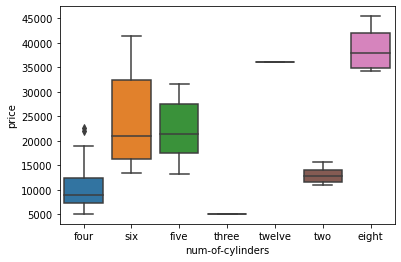

In [40]:
sb.boxplot(x="num-of-cylinders", y="price", data=df);

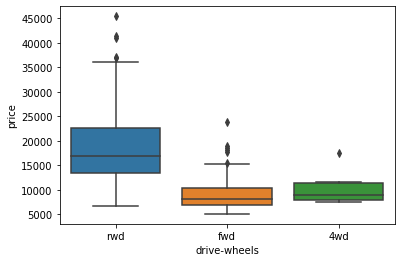

In [41]:
sb.boxplot(x="drive-wheels", y="price", data=df);

13.	What do you infer from the boxplots about the relationship between the variables.

---

Price is related in a varied manner with all the categoricla variables.
The higher price automobile are less in number as compared to the lower priced automobiles. 


14.	Use describe() to get descriptive statistics of numeric variables

In [45]:
clmn = list(df)
clmn

['symboling',
 'normalized-losses',
 'make',
 'aspiration',
 'num-of-doors',
 'body-style',
 'drive-wheels',
 'engine-location',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-type',
 'num-of-cylinders',
 'engine-size',
 'fuel-system',
 'bore',
 'stroke',
 'compression-ratio',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg',
 'price',
 'city-L/100km',
 'horsepower-binned',
 'diesel',
 'gas']

In [48]:
for i in clmn:

  if df.dtypes != 'object':
    print(df[i].desribe)

ValueError: ignored

In [49]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object